In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data(n_values,model_type,shift):
    cp_split = []
    res_gauss = []
    for i in n_values:
        filename = "error_table_California_Housing_" + model_type + "_" + shift + "_n" + str(i) + ".csv"
        df = pd.read_csv(filename)
        res_gauss.append(1 - df.iloc[0]["Res-Gauss"])
        if shift == "without":
            cp_split.append(1 - df.iloc[0]["CP-S"])
        else:
            cp_split.append(1 - df.iloc[0]["CP-SW"])
        emp = 1 - df.iloc[0]["emp coverage"]
        
    return cp_split,res_gauss,emp


def get_plot(n_values,cp_split,res_gauss,emp,legend1):
    plt.plot(n_values,cp_split,'-b*',label = legend1)
    plt.plot(n_values,res_gauss,'-go',label = "Res-Gauss")
    plt.plot(n_values,[emp] * len(n_values),'--r',label = "Emp",linewidth = 4)
    plt.xlabel('n',fontsize = 14)
    plt.ylabel('miss-coverage',fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend()
    plt.xlim([0,1600])
    plt.grid(True)
    plt.title('miss-coverage variation over the calibration set size n')
    plt.show()

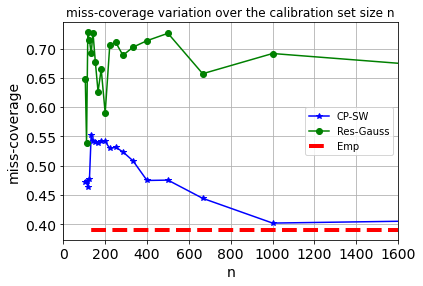

In [3]:
n = 2000
n_values = [int(n/i) for i in range(1,20,1)]
cp_split, res_gauss, emp = get_data(n_values,"NN","with")
get_plot(n_values,cp_split,res_gauss,emp,"CP-SW")

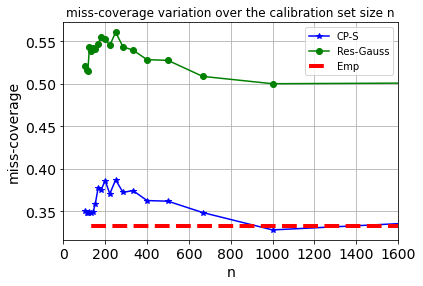

In [4]:
n = 2000
n_values = [int(n/i) for i in range(1,20,1)]
cp_split, res_gauss, emp = get_data(n_values,"NN","without")
get_plot(n_values,cp_split,res_gauss,emp,"CP-S")